<a href="https://colab.research.google.com/github/nandasbl/pariwisata/blob/main/Prediksi%20Pariwisata%20pulau%20seribu%20(1)%20(data%202018-juli%202020)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Time series analysis and forecasting with Python**

In [22]:
# Import library
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import itertools
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

plt.style.use('bmh'); sns.set()

In [3]:
Pn = pd.read_csv('https://raw.githubusercontent.com/nandasbl/pariwisata/main/data-penumpang-kapal-2018-2020.csv', sep=',')
Pn

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,1/1/2018,P. MUARA ANGKE,12,32,1370,7783
1,1/2/2018,P. MUARA ANGKE,15,14,841,2303
2,1/3/2018,P. MUARA ANGKE,13,6,1013,981
3,1/4/2018,P. MUARA ANGKE,7,10,811,1092
4,1/5/2018,P. MUARA ANGKE,12,13,1017,763
...,...,...,...,...,...,...
8626,6/26/2020,SABIRA,1,1,8,8
8627,6/27/2020,SABIRA,0,1,0,12
8628,6/28/2020,SABIRA,1,0,12,0
8629,6/29/2020,SABIRA,1,2,0,23


In [4]:
Pn.head()

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,1/1/2018,P. MUARA ANGKE,12,32,1370,7783
1,1/2/2018,P. MUARA ANGKE,15,14,841,2303
2,1/3/2018,P. MUARA ANGKE,13,6,1013,981
3,1/4/2018,P. MUARA ANGKE,7,10,811,1092
4,1/5/2018,P. MUARA ANGKE,12,13,1017,763


In [5]:
Pn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631 entries, 0 to 8630
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tanggal          8631 non-null   object
 1   pelabuhan        8631 non-null   object
 2   kapal_berangkat  8631 non-null   int64 
 3   kapal_tiba       8631 non-null   int64 
 4   penumpang_naik   8631 non-null   int64 
 5   penumpang_turun  8631 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 404.7+ KB


In [6]:
print(Pn.shape)
Pn.duplicated().sum()

(8631, 6)


2

In [7]:
Pn.drop_duplicates(inplace=True)
print(Pn.duplicated().sum()) # no more duplicates
print(Pn.shape) # re-check by printing data size

0
(8629, 6)


In [8]:
Pn['tanggal'] = Pn['tanggal'].astype('datetime64[ns]')
Pn['pelabuhan']=Pn['pelabuhan'].astype('category')
Pn.dtypes

tanggal            datetime64[ns]
pelabuhan                category
kapal_berangkat             int64
kapal_tiba                  int64
penumpang_naik              int64
penumpang_turun             int64
dtype: object

In [9]:
Pn.describe()

,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
count,8629.000000,8629.000000,8629.000000,8629.000000
mean,5.367250,5.590798,266.405377,267.430409
std,5.189939,8.480418,527.452039,529.846072
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,54.000000,57.000000
50%,4.000000,4.000000,121.000000,125.000000
75%,6.000000,6.000000,263.000000,274.000000
max,94.000000,570.000000,8445.000000,8640.000000


In [10]:
# Buang kolom yang tidak mempengaruhi prediksi

cols = ['pelabuhan','kapal_berangkat','kapal_tiba','penumpang_turun']
Pn.drop(cols, axis = 1, inplace = True)
Pn.head()

,tanggal,penumpang_naik
0,2018-01-01,1370
1,2018-01-02,841
2,2018-01-03,1013
3,2018-01-04,811
4,2018-01-05,1017


In [12]:
# Sort the Order Date 
Pn = Pn.sort_values('tanggal')

#print the sorted values
print(Pn.head(1))

#cek missing values
Pn.isnull().sum()

     tanggal  penumpang_naik
0 2018-01-01            1370


tanggal           0
penumpang_naik    0
dtype: int64

In [13]:
# mengkelompokkan tanggal sesuai penumpang naik
Pn.groupby('tanggal')['penumpang_naik'].sum().reset_index()

# minimal dan maksimal 
print(Pn['tanggal'].min())
print(Pn['tanggal'].max())

2018-01-01 00:00:00
2020-06-30 00:00:00


In [14]:
import datetime

In [15]:
#set 'tanggal' as index
Pn = Pn.set_index('tanggal')
Pn.index

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-02',
               ...
               '2020-06-30', '2020-06-30', '2020-06-30', '2020-06-30',
               '2020-06-30', '2020-06-30', '2020-06-30', '2020-06-30',
               '2020-06-30', '2020-06-30'],
              dtype='datetime64[ns]', name='tanggal', length=8629, freq=None)

In [16]:
# rata-rata penumpang naik tiap bulan
y = Pn['penumpang_naik'].resample('MS').mean()
y['2018':]

tanggal
2018-01-01    290.967742
2018-02-01    245.198413
2018-03-01    364.831541
2018-04-01    444.933333
2018-05-01    289.622222
2018-06-01    755.003704
2018-07-01    423.806452
2018-08-01    295.967742
2018-09-01    300.822222
2018-10-01    257.215054
2018-11-01    268.840741
2018-12-01    271.019841
2019-01-01    133.437276
2019-02-01    157.230159
2019-03-01    199.732258
2019-04-01    304.181481
2019-05-01    150.235484
2019-06-01    601.090000
2019-07-01    374.200000
2019-08-01    275.209677
2019-09-01    287.740000
2019-10-01    277.241935
2019-11-01    270.183333
2019-12-01    342.229032
2020-01-01    156.607670
2020-02-01    171.927586
2020-03-01     87.206452
2020-04-01      6.455556
2020-05-01      4.087097
2020-06-01     52.223333
Freq: MS, Name: penumpang_naik, dtype: float64

# **Data Visualisation**

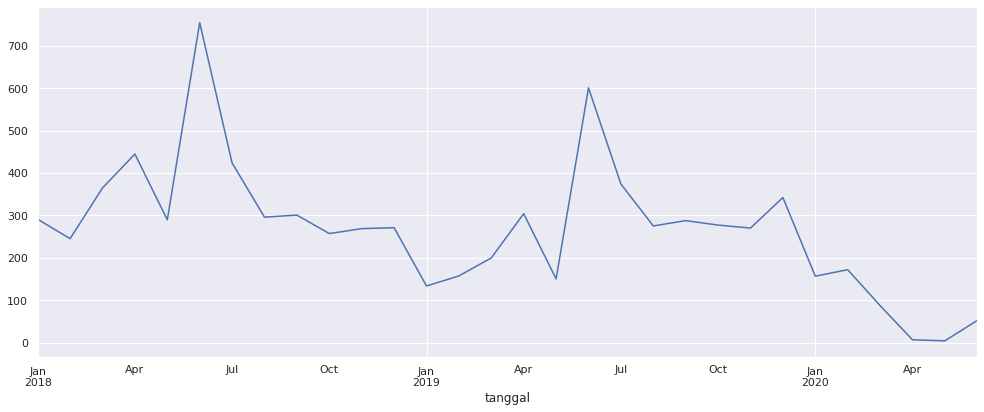

In [17]:
y.plot(figsize = (15, 6))
plt.show()

**Time Series Decomposition**

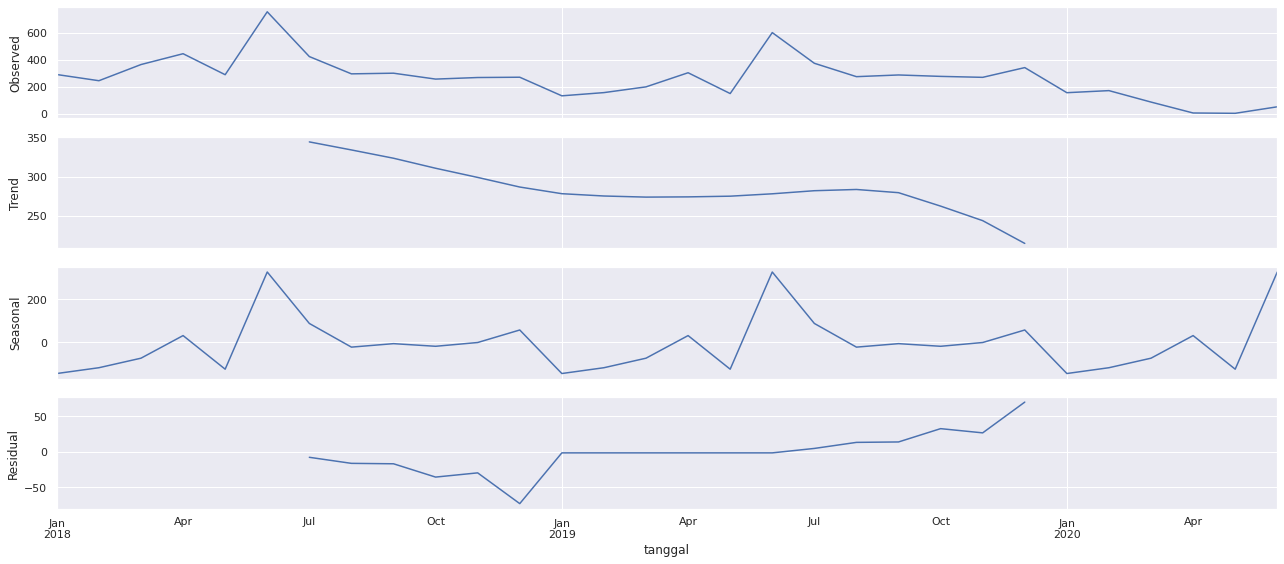

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

**Time series forecasting with ARIMA Model**

In [19]:
# set range untuk p, d, q 
p = d = q = range(0, 2)

# ambil semua kemungkinan dari kombinasi p , d , dan q 
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Contoh of Kombinasi Parameter untuk Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Contoh of Kombinasi Parameter untuk Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
# Menggunakan gird untuk mencari hasil yang paling optimal dari parameter untuk mengahasilkan performansi terbaik 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:431.38469306552605
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:239.1668263103172
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:411.5048043049236
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:238.67144703218935
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:415.8409546444925
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:236.98885399782128
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:400.3770572434952
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:237.98750153251265
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:379.6530452687553
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:214.5397597785275
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:368.3912672073
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:216.49898311179686
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:373.43151595477275
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:215.20905104127016
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:365.50630978791395
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:217.15871948204665
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:393.37240765252363
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:230.63025362783594
AR

In [ ]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8392      0.819     -1.025      0.306      -2.444       0.766
ma.L1          0.2444      1.109      0.220      0.826      -1.929       2.418
ar.S.L12       0.1603      2.470      0.065      0.948      -4.680       5.001
sigma2      1.149e+04   8177.610      1.405      0.160   -4536.663    2.75e+04


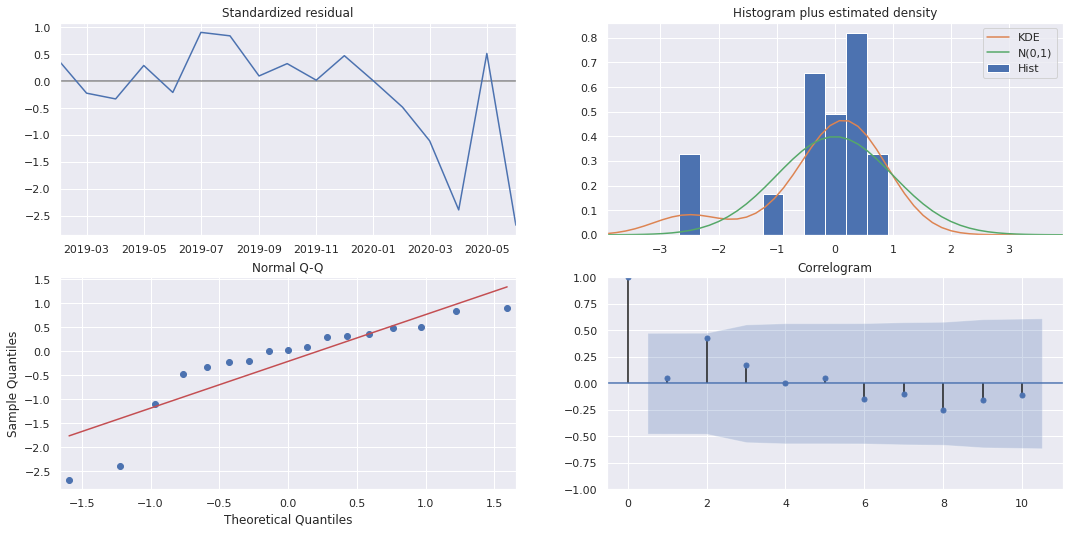

In [21]:
#run model 
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [ ]:
prediction = result.get_prediction(start = pd.to_datetime('2020-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower penumpang_naik,upper penumpang_naik
tanggal,,
2020-01-01,-56.460754,368.262228
2020-02-01,12.342350,435.277082
2020-03-01,-4.166564,416.198787
2020-04-01,52.824023,473.037481
2020-05-01,-261.364406,158.839983
2020-06-01,129.020347,549.224195


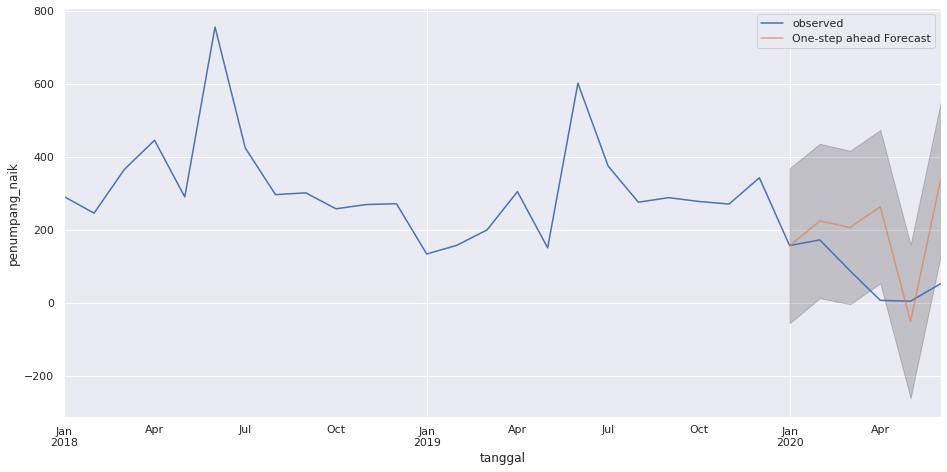

In [ ]:
#Visualize the forecasting
ax = y['2018':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("tanggal")
ax.set_ylabel('penumpang_naik')
plt.legend()
plt.show()

**Error Analysis**

In [ ]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2018-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 27993.68
The Root Mean Squared Error of our forecasts is 167.31


**Produksi dan Visualisasi prediksi**

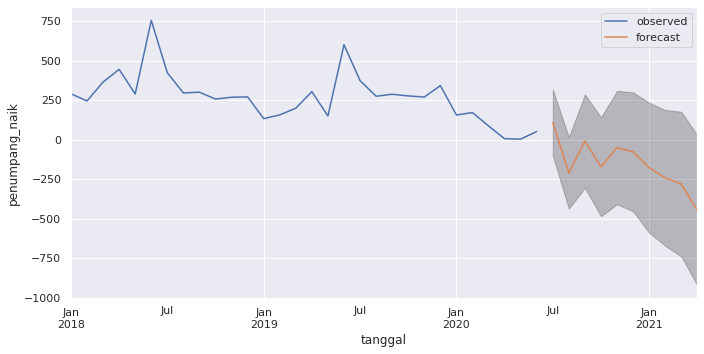

In [ ]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 10)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (10, 5))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('tanggal')
ax.set_ylabel('penumpang_naik')

plt.legend()
plt.show()